# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
666,A320,Business,Economy Class,London Heathrow to Madrid,March 2019,5.0,5.0,NaN,NaN,5.0,NaN,5,yes,✅ Trip Verified | London Heathrow to Madrid. I...
461,NaN,Couple Leisure,Economy Class,Johannesburg to Amsterdam via London,September 2019,4.0,5.0,1.0,1.0,1.0,2.0,2,no,✅ Trip Verified | Johannesburg to Amsterdam v...
236,NaN,Solo Leisure,Premium Economy,Denver to London,October 2021,5.0,5.0,NaN,NaN,5.0,NaN,5,yes,✅ Trip Verified | The crew at Denver airport ...
903,Boeing 777-200 ER,Solo Leisure,Premium Economy,Toronto to London,June 2018,3.0,5.0,4.0,3.0,5.0,NaN,4,yes,✅ Trip Verified | I took the new option of the...
784,Boeing 777,Business,Business Class,Gatwick to Orlando,October 2018,1.0,2.0,3.0,1.0,2.0,1.0,1,no,✅ Trip Verified | Gatwick to Orlando. Stains ...


In [4]:
df.to_csv("BA_reviews.csv", index=False)

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df = pd.read_csv('BA_reviews.csv')

## Data Cleaning

In [6]:
df.shape

(1000, 15)

In [7]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [8]:
df.sample(5)

,Unnamed: 0,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
442,442,NaN,Couple Leisure,Economy Class,London Gatwick to Salzburg,April 2019,2.0,3.0,3.0,2.0,2,no,2.0,2.0,| London Gatwick to Salzburg with British Air...
280,280,NaN,Solo Leisure,Economy Class,London to Cairo,December 2020,5.0,5.0,NaN,5.0,4,yes,NaN,NaN,| I was supposed to fly with Aeroflot on the...
436,436,Boeing 777-200,Family Leisure,Economy Class,Gatwick to Barbados,October 2019,4.0,4.0,4.0,5.0,5,yes,5.0,5.0,| Flight from Gatwick to Barbados. Check in ...
601,601,A321,Business,Economy Class,Sofia to Belfast via London,May 2019,1.0,1.0,1.0,1.0,1,no,NaN,NaN,| Sofia to Belfast via London. The legroom o...
144,144,Boeing 777,Couple Leisure,Business Class,Cape Town to London Heathrow,March 2022,3.0,3.0,1.0,3.0,1,no,NaN,NaN,| Very poor flight from Cape Town to London. ...


## Analysis Data

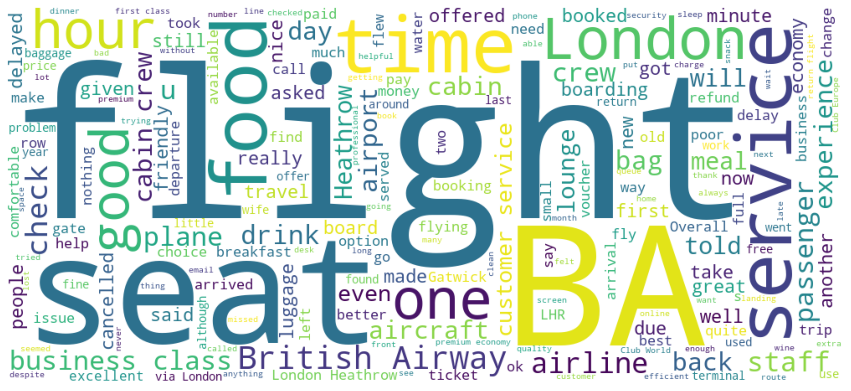

In [9]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time. showing that people are actively talking about their experience on the plane and the staff.

### Satisfaction of customer

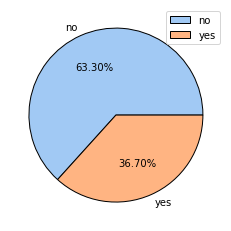

In [16]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

From the pie chart above, we know that 63.3% of passengers are dissatisfied with British Airways services. let's breakdown the data to found what make passengers dissatisfied :

### View rating of BA service by passenger that dissatisfied with British Airways

In [18]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,633.000000,560.000000,555.000000,456.000000,582.000000,633.000000,316.000000,138.000000
mean,501.688784,2.092857,2.425225,1.861842,1.979381,1.628752,2.132911,1.543478
std,294.048083,1.059223,1.329780,1.044395,1.212210,0.898096,1.193125,1.033169
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,243.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,502.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,761.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
max,999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Analysis food on airways

In [19]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

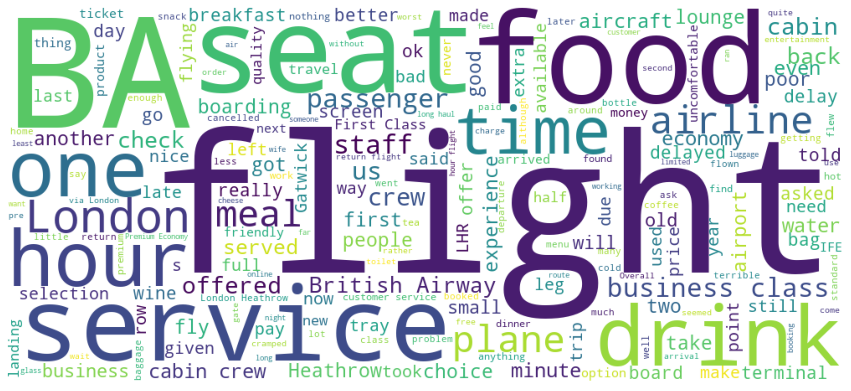

In [20]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

I analyse the test.csv file, and get information that :

1. Time to deliver the order is too long
2. For free catering just bottle of water and a packet of crisps
3. Minimal selection of food items for purchase.

### Analysis value for money

In [21]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

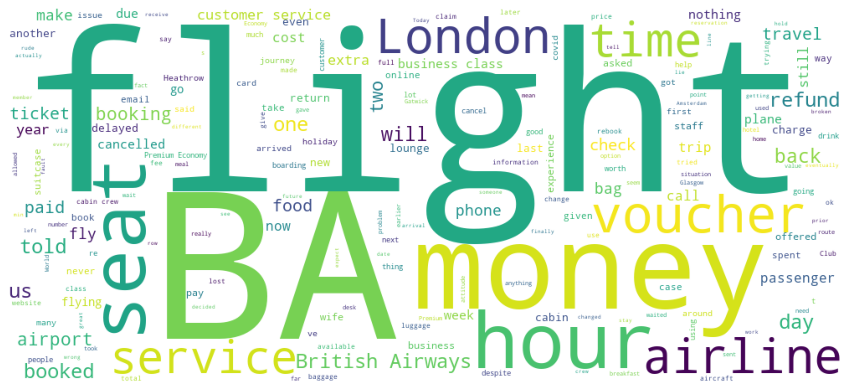

In [22]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

what I get from analysis the data :
1. The refund take a lot of time
2. Forced to use of vouchers however it was useless
3. Long delay time